In [43]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lib.residental_data_source import ResidentialDataSource


## Создание датасета

В файле converter.py

In [44]:
data_source = ResidentialDataSource('src/merged_inner.xlsx')
data_set = data_source.fetch_data_set()

In [45]:
data_set.head()

,Unnamed: 0.1,Unnamed: 0,index(),Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,...,Внутренний двор без машин,Вид из окна на море,Дата сбора информации,"Общая сумма полученных денег с проданных квартир, руб",Количество проданных машиномест,Количество проданных квартир,Общая площадь проданных квартир,Процент распроданности,Кумулятивная средняя стоимость кв.метра,Количество проданных нежилых помещений
0,0,253,254,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,254,255,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,255,256,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,256,257,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,257,258,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ds = data_set.copy()

columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'index()', 'Продано квартир, м2', 'Продано квартир, руб','Unnamed: 18']
ds.drop(columns=columns_to_drop, inplace=True)

print('Размер выборки: {}, {}'.format(ds.shape[0], ds.shape[1]))
ds.head()

Размер выборки: 1607, 118


,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Внутренний двор без машин,Вид из окна на море,Дата сбора информации,"Общая сумма полученных денег с проданных квартир, руб",Количество проданных машиномест,Количество проданных квартир,Общая площадь проданных квартир,Процент распроданности,Кумулятивная средняя стоимость кв.метра,Количество проданных нежилых помещений
0,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Апрель 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Май 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Июнь 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Июль 2021,0.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Август 2021,1.0,...,Да,0.0,22.12.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Разведочный анализ данных


## Data Preparation

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Columns: 118 entries, Регион to Количество проданных нежилых помещений
dtypes: float64(27), int64(38), object(53)
memory usage: 1.4+ MB


In [19]:
ds[ds.duplicated()]

,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Внутренний двор без машин,Вид из окна на море,Дата сбора информации,"Общая сумма полученных денег с проданных квартир, руб",Количество проданных машиномест,Количество проданных квартир,Общая площадь проданных квартир,Процент распроданности,Кумулятивная средняя стоимость кв.метра,Количество проданных нежилых помещений


### Обработка типов данных

In [47]:
ds.dtypes

Регион                                                    object
Населенный пункт                                          object
Группа компаний                                           object
ID проекта                                                 int64
Проект                                                    object
Корпус                                                     int64
Класс недвижимости                                        object
Статус                                                    object
Месяц                                                     object
Продано квартир, шт                                      float64
Продано нежилых, шт                                      float64
Продано нежилых, м2                                      float64
Продано нежилых, руб                                     float64
Продано машиномест, шт                                   float64
Продано машиномест, м2                                   float64
Продано машиномест, руб  

### Подозрительные типы данных:

### изменить на float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Общая площадь квартир                                | <span style="color:blue">object</span>   |
| Общая площадь земельного участка                     | <span style="color:blue">object</span>   |

### изменить на date

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Дата получения РС                                     | <span style="color:blue">object</span>   |
| Дата публикации ИНС                                   | <span style="color:blue">object</span>   |
| Дата сбора информации                                 | <span style="color:blue">object</span>   |

### изменить на float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Широта                                                | <span style="color:blue">float64</span>  |
| Долгота                                               | <span style="color:blue">object</span>   |

### проверить уникальные, изменить на int/float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Расстояние по навигатору до: Луговая                  | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Центр                    | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Первая речка             | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Вторая речка             | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Третья рабочая           | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Окатовая                 | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Баляева                  | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Кампус ДВФУ              | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Артем                    | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: В-надеждинское           | <span style="color:blue">int64</span>    |

### проверить уникальные

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Вид из окна на море                                   | <span style="color:blue">float64</span>  |


In [54]:
float_col =  ['Общая площадь квартир', 'Общая площадь земельного участка']
for col in float_col:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')


In [56]:
date_col =  ['Дата получения РС', 'Дата публикации ИНС', 'Дата сбора информации']
for col in date_col:
    ds[col] = pd.to_datetime(ds[col], dayfirst=True, errors='coerce')

In [57]:
ds['Долгота'] = ds['Долгота'].astype('float64')

In [58]:
int_float_columns = {
        'Расстояние по навигатору до: Луговая': 'int64',
        'Расстояние по навигатору до: Центр': 'float64',
        'Расстояние по навигатору до: Первая речка': 'float64',
        'Расстояние по навигатору до: Вторая речка': 'int64',
        'Расстояние по навигатору до: Третья рабочая': 'float64',
        'Расстояние по навигатору до: Окатовая': 'int64',
        'Расстояние по навигатору до: Баляева': 'float64',
        'Расстояние по навигатору до: Кампус ДВФУ': 'int64',
        'Расстояние по навигатору до: Артем': 'int64',
        'Расстояние по навигатору до: В-надеждинское': 'int64'
    }
for col in int_float_columns:
    print(ds[col].value_counts())

Расстояние по навигатору до: Луговая
4     260
10    237
5     231
9     145
6     102
8      87
3      79
35     61
19     55
55     51
27     48
33     33
25     28
28     24
15     20
1      20
2      20
21     20
12     20
45     20
16     20
14     10
24      8
20      8
Name: count, dtype: int64
Расстояние по навигатору до: Центр
10.0    337
9.0     191
11.0    155
6.0     111
12.0     98
13.0     92
14.0     56
18.0     55
7.0      54
49.0     51
29.0     51
2.0      40
5.0      37
25.0     36
26.0     36
27.0     33
4.0      30
2.5      20
8.0      20
39.0     20
19.0     20
28.0     18
16.0     16
24.0     10
33.0     10
3.0      10
Name: count, dtype: int64
Расстояние по навигатору до: Первая речка
8.0     287
10.0    174
7.0     166
9.0     134
6.0     124
4.0      99
14.0     74
23.0     72
13.0     64
15.0     55
42.0     51
27.0     51
2.0      40
5.0      39
11.0     36
24.0     33
36.0     20
0.4      20
17.0     20
25.0     18
21.0     10
29.0     10
1.0      10
Name: 

Замечание: почти все значения расстояний - это целые значения. Тогда приведем к типу данных int64 все колонки из списка.

In [59]:
int_columns = {
    'Расстояние по навигатору до: Центр': 'float64',
    'Расстояние по навигатору до: Первая речка': 'float64',
    'Расстояние по навигатору до: Третья рабочая': 'float64',
    'Расстояние по навигатору до: Баляева': 'float64'
}

for col in int_columns:
    ds[col] = ds[col].astype('int64')

In [62]:
ds['Вид из окна на море'].value_counts()

Вид из окна на море
0.0    1261
2.0     120
1.0     112
0.5      48
3.0      46
2.5      20
Name: count, dtype: int64

<Axes: >

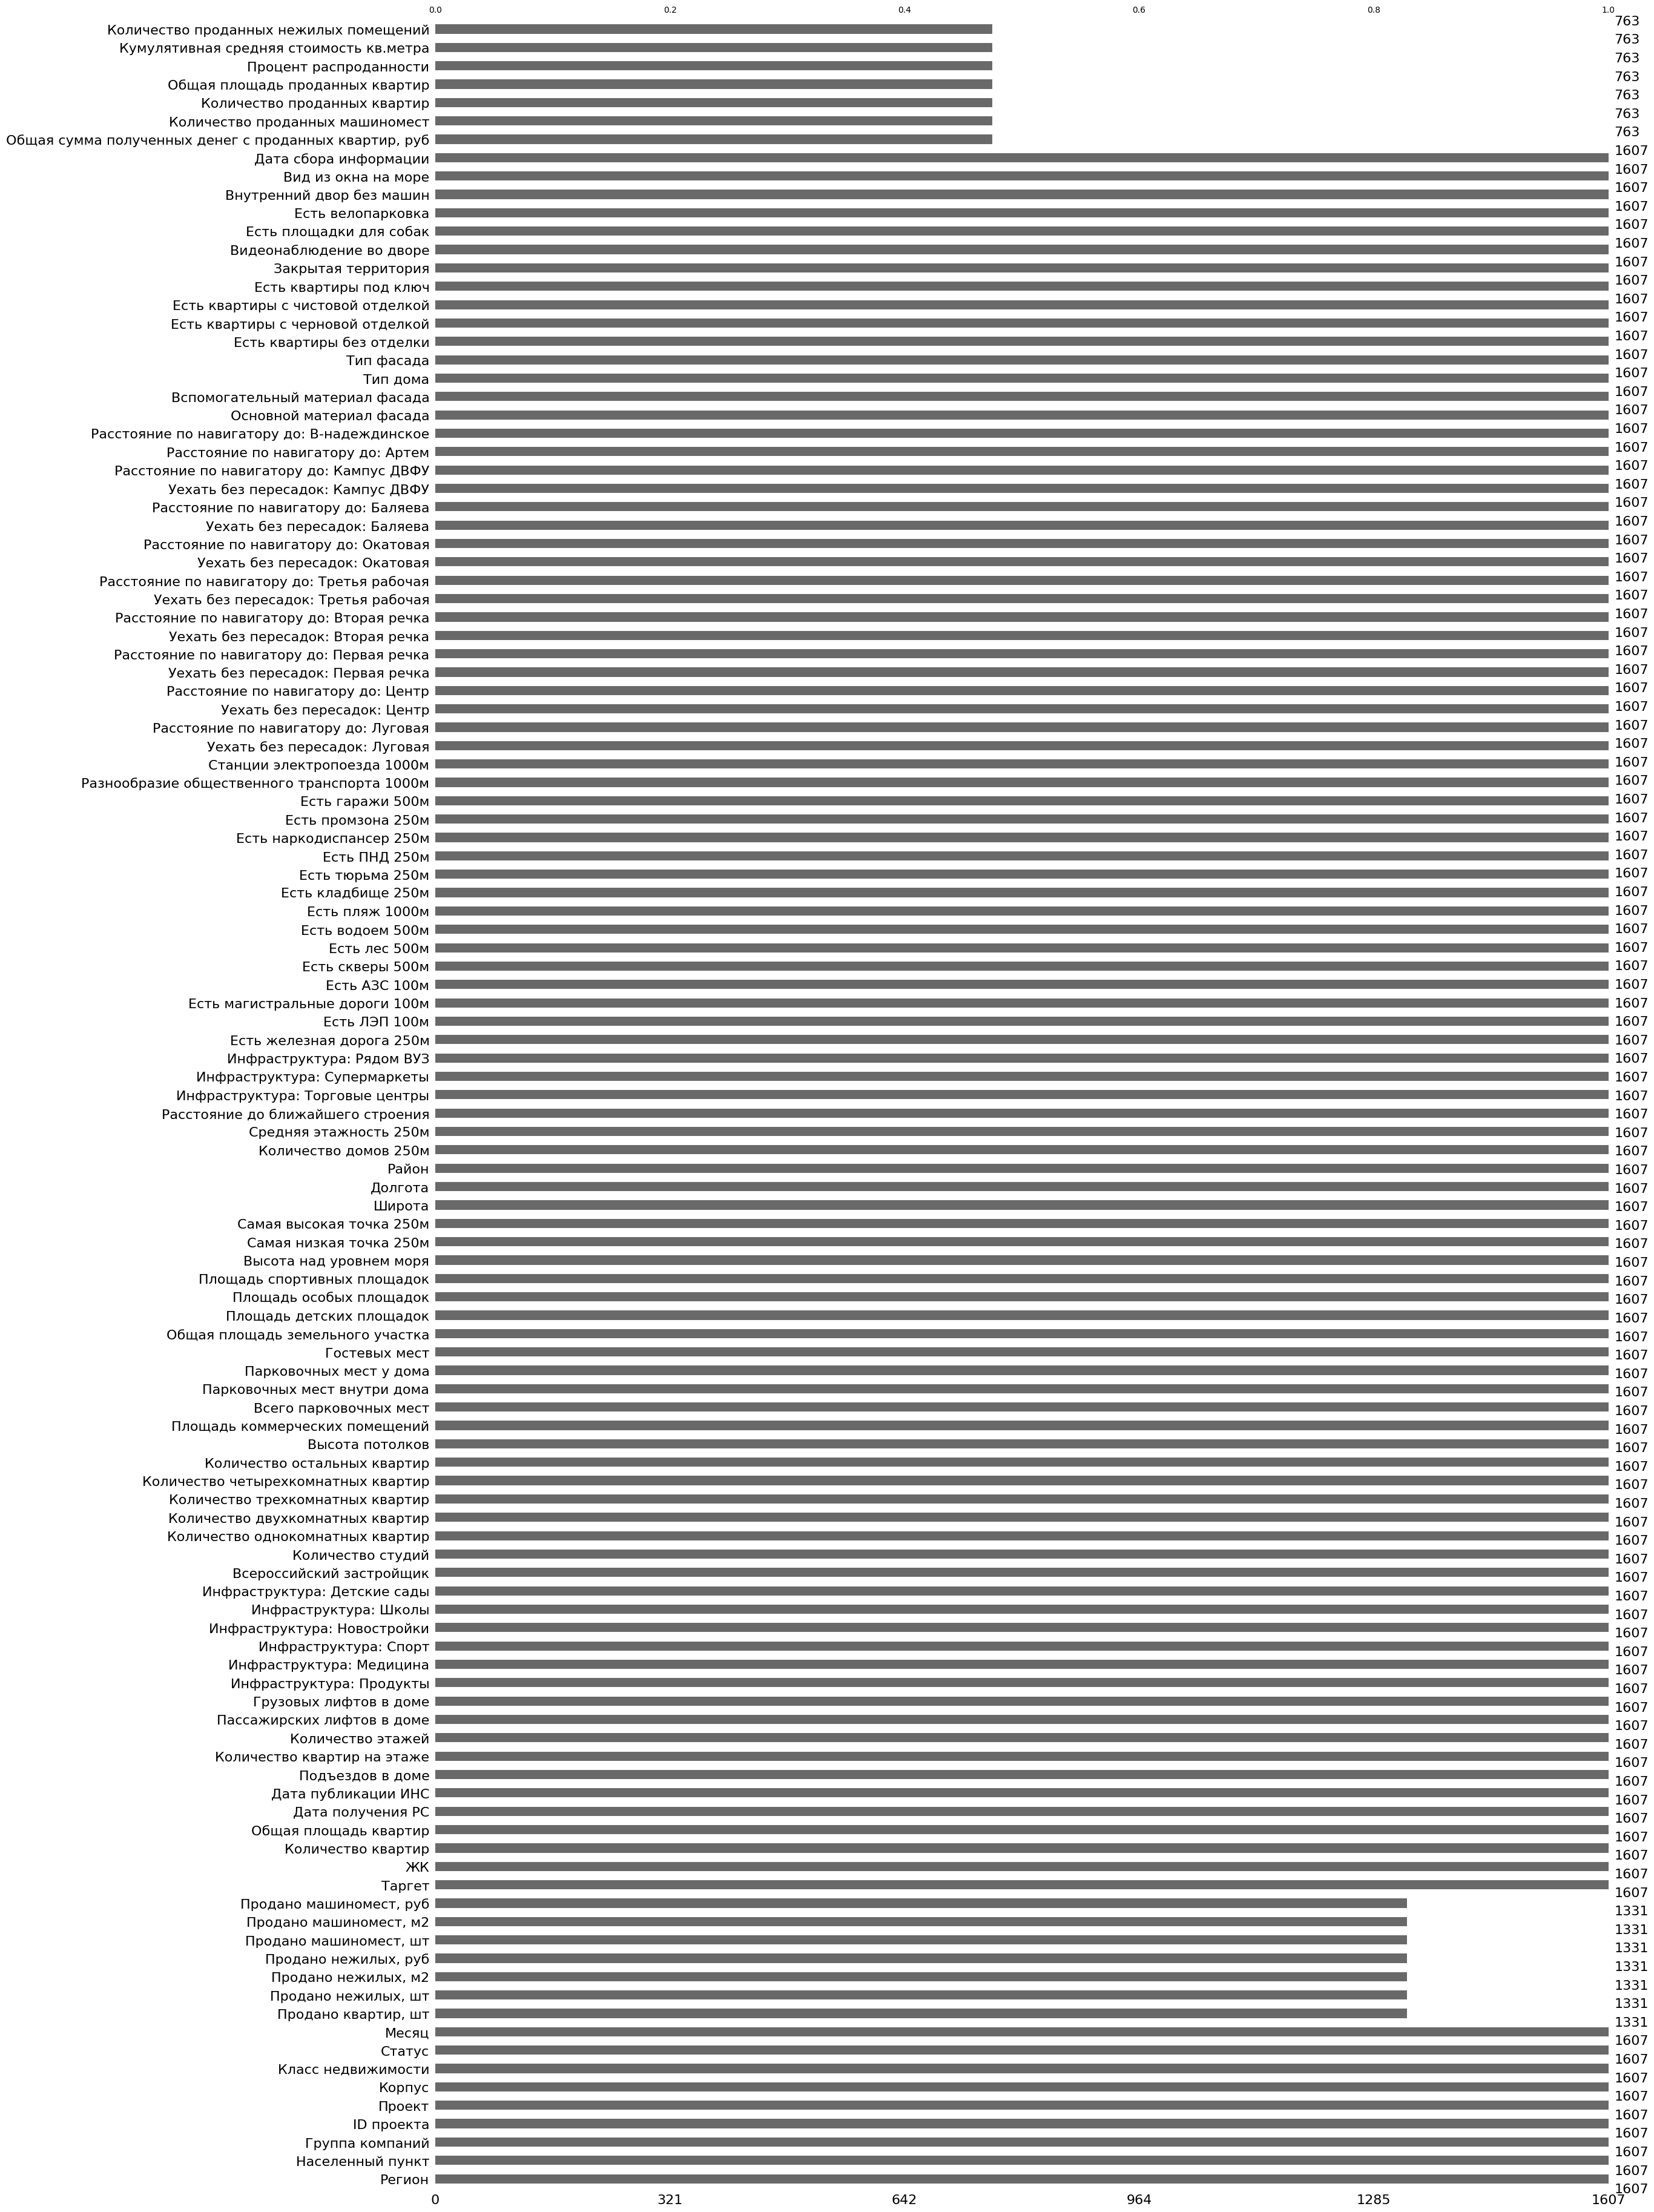

In [20]:
msno.bar(ds)

<Axes: >

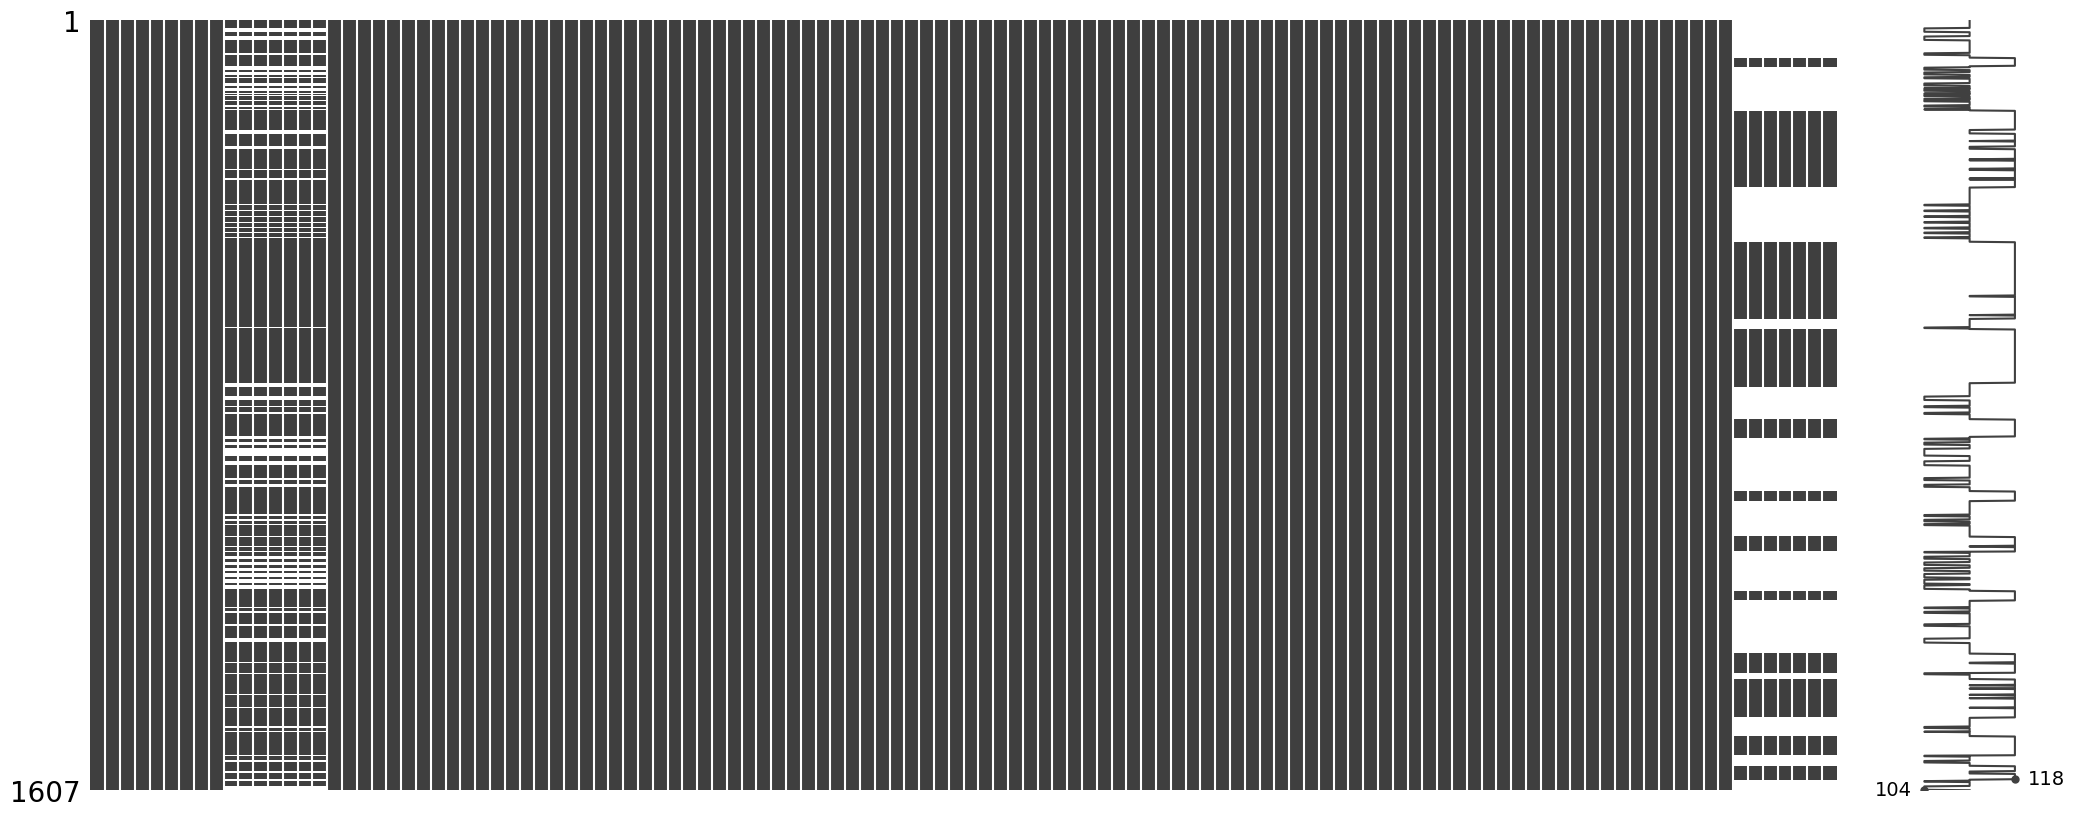

In [21]:
msno.matrix(ds)

In [22]:
def missing_values(data_set):
    missing_values = (data_set.isna().sum() / len(data_set) * 100).sort_values()
    missing_values_df = pd.DataFrame(missing_values)
    pd.set_option('display.max_rows', len(missing_values_df))
    return missing_values_df

missing_values(ds)

,0
Регион,0.000000
Населенный пункт,0.000000
Группа компаний,0.000000
ID проекта,0.000000
Проект,0.000000
Корпус,0.000000
Класс недвижимости,0.000000
Статус,0.000000
Месяц,0.000000
Подъездов в доме,0.000000


In [23]:
def useful_rows(df):
    print('Полность заполненные объекты: ', len(df.dropna()))
    print('Процент полностью заполненных объектов: ', round(len(df.dropna()) / len(df) * 100, 2))

useful_rows(ds)

Полность заполненные объекты:  707
Процент полностью заполненных объектов:  44.0


### Краткий вывод

Большинство столбцов не имеют пропущенных значений. Пропуски наблюдаются только в столбцах по продажам.

##  Data Cleaning 



### Обработка пропущенных значений 

Среднее значение: Подходит, если данные имеют нормальное распределение.


Медиана: Хорошо подходит, если данные имеют выбросы.


Мода: Если данные категориальные или имеют повторяющиеся значения.


Интерполяция: Заполнение на основе соседних значений, если данные имеют временной или порядковый характер.

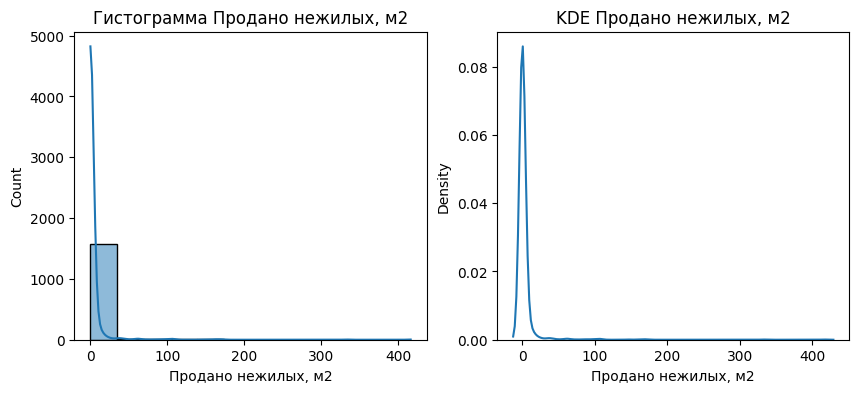

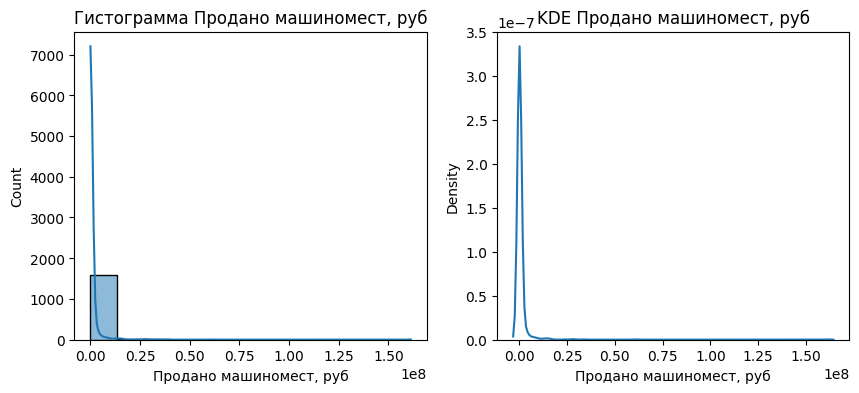

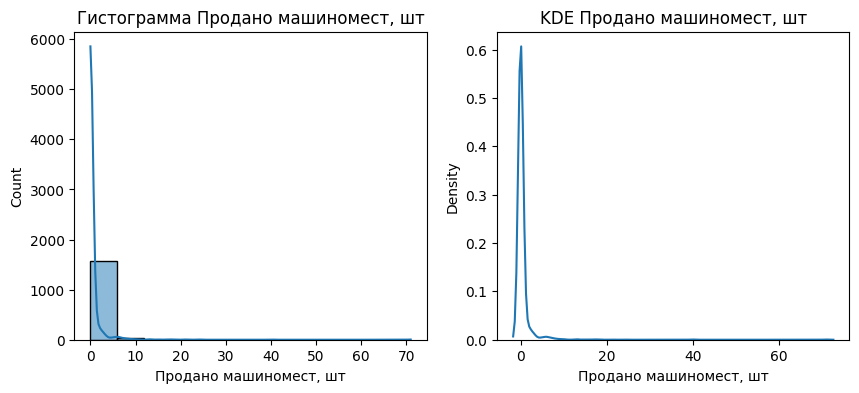

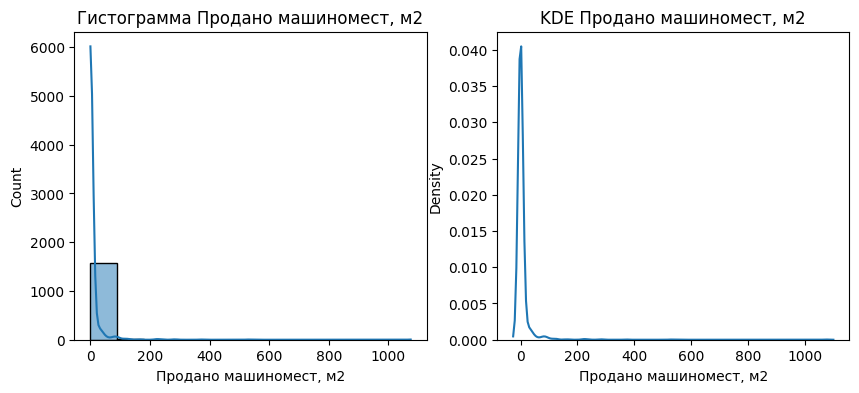

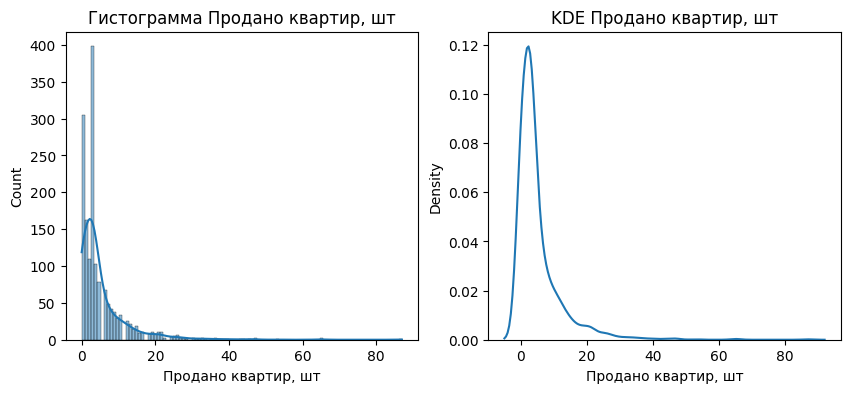

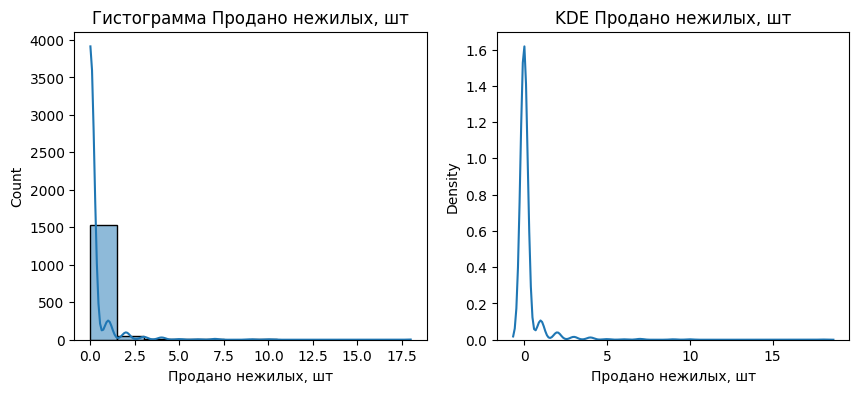

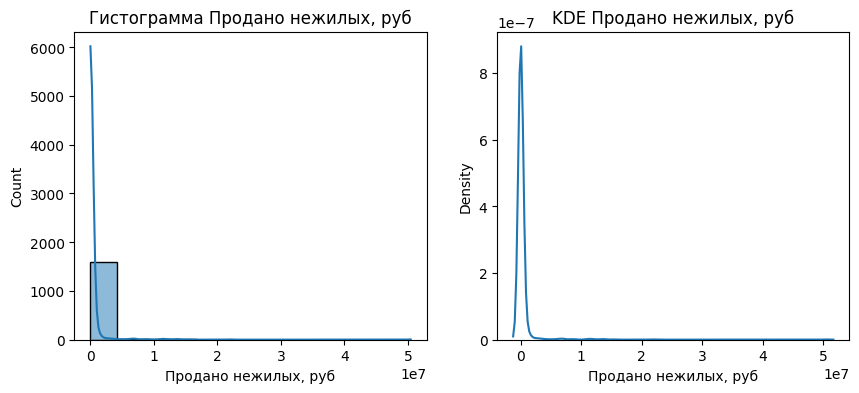

In [38]:
columns = ['Продано нежилых, м2', 'Продано машиномест, руб', 'Продано машиномест, шт', 
           'Продано машиномест, м2', 'Продано квартир, шт', 'Продано нежилых, шт', 
            'Продано нежилых, руб']

for column in columns:
    plt.figure(figsize=(10, 4))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(ds[column].dropna(), kde=True)
    plt.title(f'Гистограмма {column}')
    
    # График KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(ds[column].dropna())
    plt.title(f'KDE {column}')
    
    plt.show()


Данные имеют нормальное распределение с длиным хвостом, для заполнения пропусков лучше всего использовать логарифимический метод для стабилизации вариации и исправления симметрии.

In [41]:
columns_to_fill = ['Продано нежилых, м2', 'Продано машиномест, руб', 'Продано машиномест, шт', 
                   'Продано машиномест, м2', 'Продано квартир, шт', 'Продано нежилых, шт', 
                   'Продано нежилых, руб']

for column in columns_to_fill:
    ds[column] = ds[column].apply(lambda x: np.nan if x < 0 else x)
    
    non_zero = ds[column] != 0

    log_col = np.log1p(ds[column][non_zero])

    median_value = log_col.median()
    log_col_filled = log_col.fillna(median_value)

    ds.loc[non_zero, column] = np.expm1(log_col_filled)
    ds[column].fillna(0, inplace=True)

    print(f"Column: {column}")
    print(ds[column].describe().apply(lambda x: f"{x: .3f}"), '\n')

Column: Продано нежилых, м2
count     1607.000
mean         3.734
std         18.409
min          1.000
25%          1.000
50%          1.000
75%          1.000
max        416.400
Name: Продано нежилых, м2, dtype: object 

Column: Продано машиномест, руб
count          1607.000
mean         594839.467
std         4833675.034
min               1.000
25%               1.000
50%               1.000
75%               1.000
max       161176320.000
Name: Продано машиномест, руб, dtype: object 

Column: Продано машиномест, шт
count     1607.000
mean         1.316
std          2.432
min          1.000
25%          1.000
50%          1.000
75%          1.000
max         71.000
Name: Продано машиномест, шт, dtype: object 

Column: Продано машиномест, м2
count     1607.000
mean         6.996
std         37.687
min          1.000
25%          1.000
50%          1.000
75%          1.000
max       1075.070
Name: Продано машиномест, м2, dtype: object 

Column: Продано квартир, шт
count     1607.000
m

C:\Users\User\AppData\Local\Temp\ipykernel_8176\1900900989.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[column].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8176\1900900989.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

### Проверка:

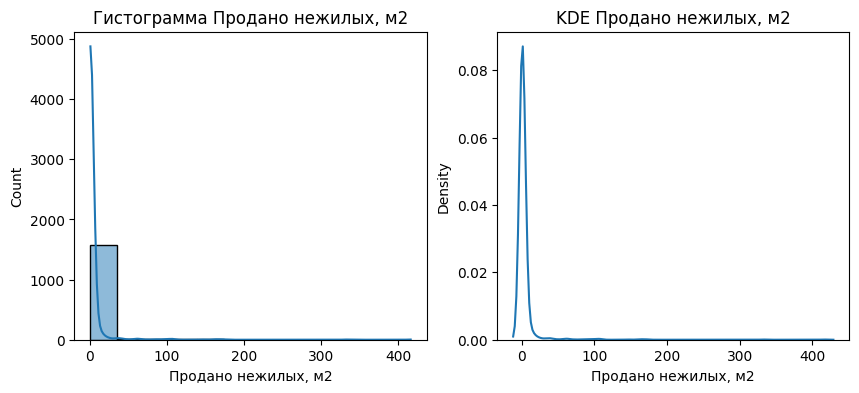

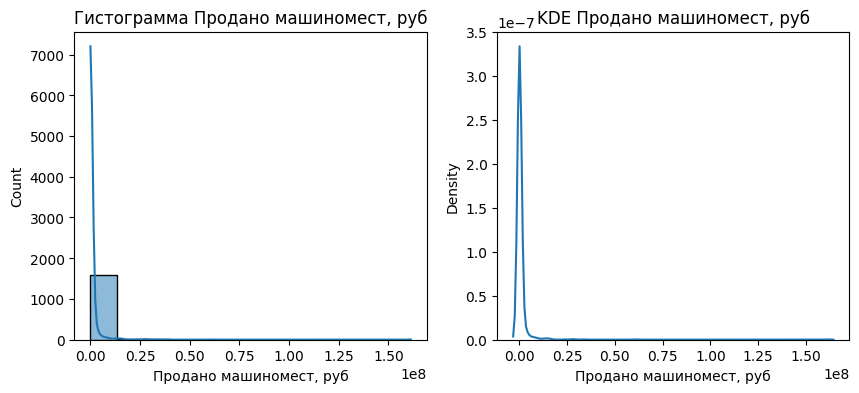

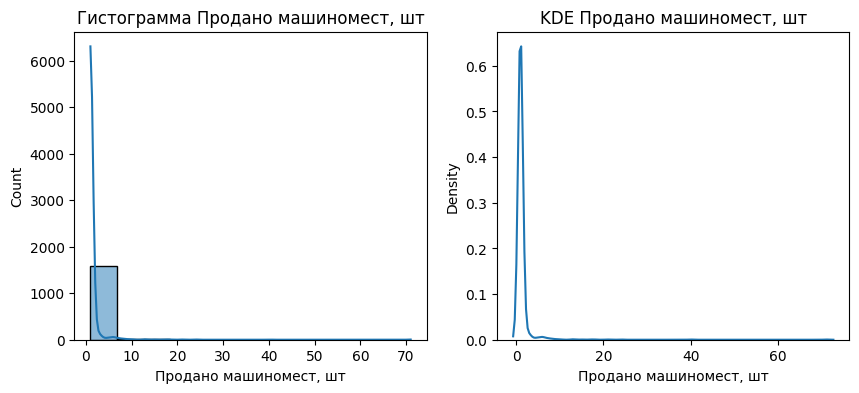

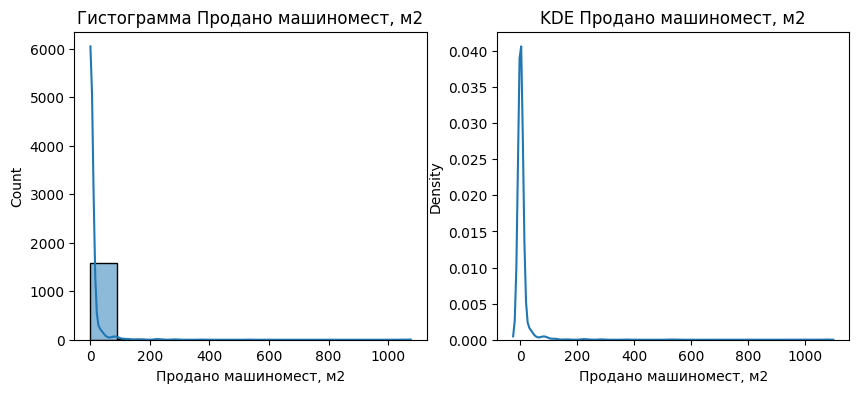

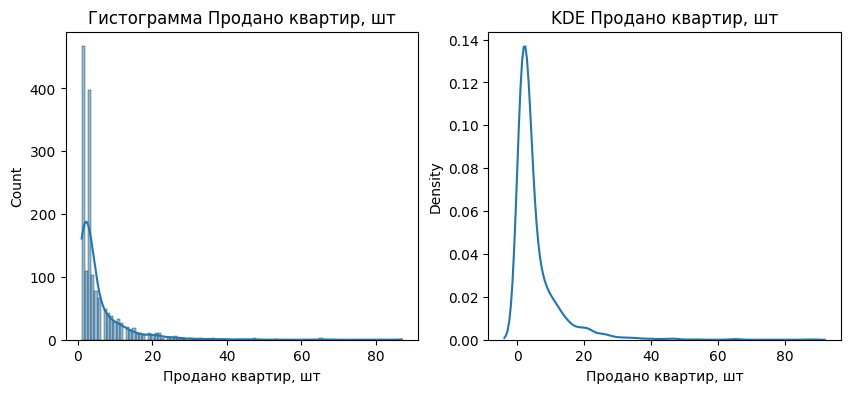

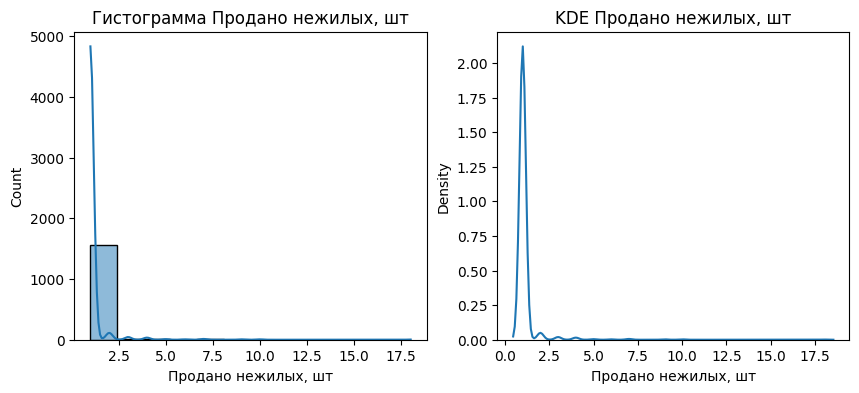

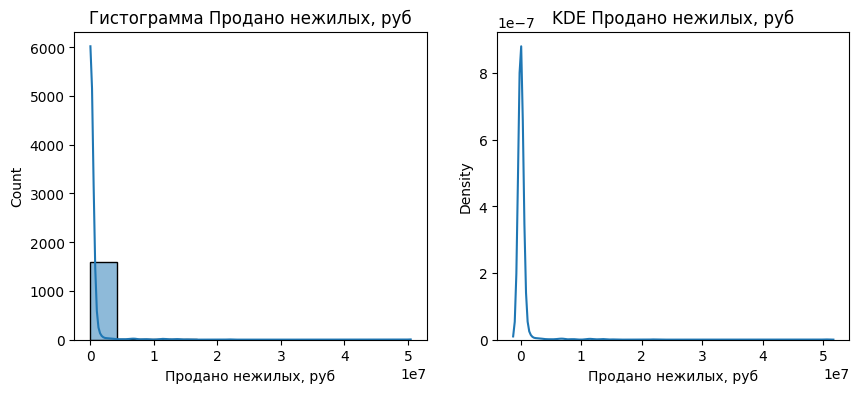

In [42]:
columns = ['Продано нежилых, м2', 'Продано машиномест, руб', 'Продано машиномест, шт', 
           'Продано машиномест, м2', 'Продано квартир, шт', 'Продано нежилых, шт', 
            'Продано нежилых, руб']

for column in columns:
    plt.figure(figsize=(10, 4))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(ds[column].dropna(), kde=True)
    plt.title(f'Гистограмма {column}')
    
    # График KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(ds[column].dropna())
    plt.title(f'KDE {column}')
    
    plt.show()


In [20]:
# Заполнение группировкой по другим признакам

columns_to_fill = ['Продано нежилых, м2', 'Продано квартир, м2', 'Продано машиномест, м2']

for column in columns_to_fill:
    median_value = ds_clean.groupby('Группа компаний')[column].transform('median')
    ds_clean[column] = ds_clean[column].fillna(median_value)


In [34]:
ds_clean['Продано нежилых, руб'].describe().apply(lambda x: f"{x: .3f}")


count         1559.000
mean        358117.198
std        1958691.547
min        -182700.000
25%              0.000
50%              0.000
75%              0.000
max       50432500.000
Name: Продано нежилых, руб, dtype: object

In [36]:
print(ds_clean['Продано нежилых, руб'].median())

0.0


In [26]:
monetary_columns = ['Продано квартир, руб', 'Продано нежилых, руб', 'Продано машиномест, руб']

for column in monetary_columns:
    # применение интерполяции в каждой группе
    ds_clean[column] = ds_clean.groupby('Группа компаний')[column].apply(lambda group: group.interpolate()).reset_index(level=0, drop=True)



In [29]:
ds_clean['Таргет'] = ds_clean['Таргет'].replace(0, np.nan)



In [25]:
ds.dtypes

Регион                                                    object
Населенный пункт                                          object
Группа компаний                                           object
ID проекта                                                 int64
Проект                                                    object
Корпус                                                     int64
Класс недвижимости                                        object
Статус                                                    object
Месяц                                                     object
Продано квартир, шт                                      float64
Продано нежилых, шт                                      float64
Продано нежилых, м2                                      float64
Продано нежилых, руб                                     float64
Продано машиномест, шт                                   float64
Продано машиномест, м2                                   float64
Продано машиномест, руб  

In [11]:
data_source.save_excel(ds_clean, 'clean_data.xlsx')
# data_source.save_csv(ds_clean, 'clean_data.csv')